# Gradient Descent Implementation

In [19]:
import numpy as np
from matplotlib import pyplot as plt

# Math Formulation

For a learning problem, let's take the matrix $X$ to be the feature space with rows $x_i$. There is the associated label vector $y$ with elements $y_i$. 

The objective of the problem is to find the hypothesis space that maps $X$ to $y$. This is hypothesis space is denotated at $H(x_i) = y_i$ or $H(X) = y$.

In the case of the linear learning problem, the hypothesis space is given below with the equivalent expressions.

$H(X) = X\theta = y$

$H(x_i) = x_i\theta = x_i^{(0)} \theta^{(0)} + x_i^{(1)} \theta^{(1)} + \cdots + x_i^{(j)} \theta^{(j)} = y_i$


$\theta$ is the linear parameters what must be learned in this problem shown by the vector below.

$\theta = [\theta^{(0)}, \theta^{(1)}, \cdots, \theta^{(n)}]^T$

The cost function for quantifying the error of the learning problem is defined as $J$ below. $M$ is the number of rows in $X$.

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(x_i\theta - y_i)^2$

The gradient descent algorithm is the defined by using the gradient of the loss function given below as a gradient definition, a summation, and as a vector.

$\nabla J(\theta) = \left[\frac{\partial J}{\partial \theta^{(0)}}, 
\frac{\partial J}{\partial \theta^{(1)}}, \cdots,
\frac{\partial J}{\partial \theta^{(n)}}\right] ^ T$

$\nabla J(\theta) = \frac{1}{m} (X\theta - y) X$

Training the algorithm is given with the following sequence.

1. Pick a random start for the $\theta$ vector
1. Take a step in the direction of negative loss $\theta_k = \theta_{k-1} - \alpha \nabla J(\theta)$
1. Repeat step 2 until $||\nabla J(\theta)||_2 \leq \epsilon$

# Practice Coding

## Creating Fake Data

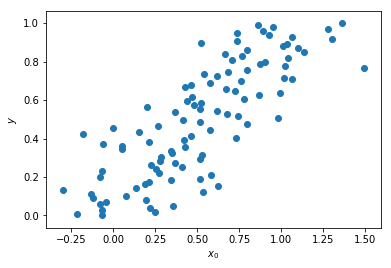

In [289]:
M = 100
N = 5
y = np.linspace(0,1,M)
X = np.zeros((M,N))
for i in range(M):
    rand_vec = np.random.randn(N) / 4
    X[i] = y[i] + rand_vec
plt.scatter(X[:,0],y)
plt.ylabel('$y$')
plt.xlabel('$x_0$')
plt.show()

## Guessing Random $\theta$

In [290]:
theta = np.random.randn(N)

## Error Function

In [291]:
def error(X, y, theta):
    return sum((X@theta - y)**2) / y.shape[0]

In [292]:
error(X, y, theta)

0.44601280805547794

## Gradient Calculation

In [293]:
grad_J = 1/M * (X@theta - y) @ X

In [294]:
grad_J

array([-0.38216751, -0.37160008, -0.35075769, -0.40126636, -0.32792366])

In [295]:
theta

array([ 0.05259363, -0.15411597,  0.1103234 , -0.62612245,  0.529723  ])

In [296]:
np.linalg.norm(grad_J)

0.8220208028107673

## Taking A Step Gradient Step

In [297]:
alpha = 0.05
theta_new = theta - alpha * grad_J

In [298]:
theta_new

array([ 0.07170201, -0.13553597,  0.12786128, -0.60605913,  0.54611919])

In [299]:
error(X, y, theta)

0.44601280805547794

In [300]:
error(X, y, theta)

0.44601280805547794

# Linear Implementation

In [348]:
def gradient_decent(X, y, verbose = True, alpha = 0.05, esp = 1e-7):
    '''
    Takes in a feature vector (X) and a label vector (y)
    and outputs the linear values of theta which are the linear
    coefficients for regression
    '''
    
    # define M and N
    M = X.shape[0]
    N = X.shape[1]
    
    # guess the first random theta
    theta = np.random.randn(N)
    
    # define the error function
    def calc_error(X, y, theta):
        return sum((X@theta - y)**2) / y.shape[0]
    error_old = calc_error(X, y, theta)
    error_change = 1
    
    # find the gradient
    grad_J = 1/M * (X@theta - y) @ X
    
    # find the norm of the gradient
    grad_norm = np.linalg.norm(grad_J)
    
    # initialize steps
    steps = 0
    
    # print out starting points
    if verbose:
        print('------- Gradient Descent Algorithm -------')
        print('Shape of X:',X.shape)
        print('Shape of y:',y.shape)
        print(f'Initial Error: {calc_error(X, y, theta):.4}')
        print()
    
    # initalize result vectors
    error_vec = []
    grad_vec = []
    
    # make a while loop for the alpha condition or the change in error
    while grad_norm > esp and error_change > esp :
        
        # update theta
        theta = theta - alpha * grad_J
        
        # calculate the new gradient
        grad_J = 1/M * (X@theta - y) @ X
        
        # calculate the gradient's norm
        grad_norm = np.linalg.norm(grad_J)
        
        # increase steps
        steps += 1
        
        # append error value
        error_new = calc_error(X, y, theta)
        error_vec.append(error_new)
        
        # append the gradient norm
        grad_vec.append(grad_norm)
        
        # calculate the change in error
        error_change = abs(error_new - error_old)
        
        # move the old to the new error
        error_old = error_new
        
        if verbose:
            print(f'Step #{steps}')
            print(f'Error: {error_old:.4}')
            print()
            
    
    # return results
    class results:
        def __init__(self):
            self.theta = theta
            self.final_error = error(X, y, theta)
            self.steps = steps
            self.error_vec = error_vec
            self.grad_vec = grad_vec
        
    return results()
results = gradient_decent(X, y, alpha = 0.05, verbose = False, esp = 1e-5)

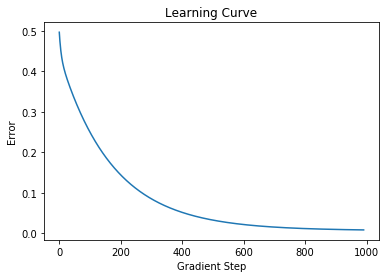

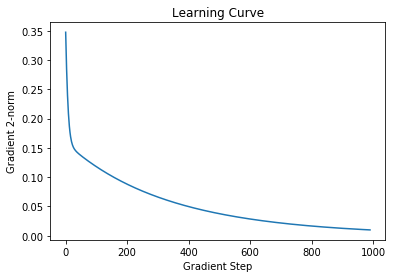

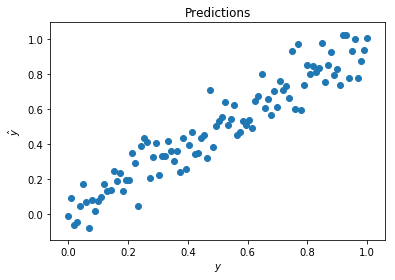

In [349]:
plt.plot(results.error_vec)
plt.title('Learning Curve')
plt.ylabel('Error')
plt.xlabel('Gradient Step')
plt.show()
plt.plot(results.grad_vec)
plt.title('Learning Curve')
plt.ylabel('Gradient 2-norm')
plt.xlabel('Gradient Step')
plt.show()
y_hat = X@results.theta
plt.scatter(y,y_hat)
plt.title('Predictions')
plt.ylabel('$\hat{y}$')
plt.xlabel('$y$')
plt.show()